In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [13]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline

**Load the Data**

In [3]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Analyze the Data

In [6]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [7]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

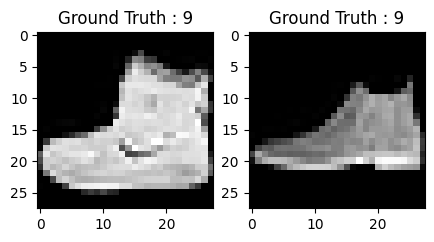

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


#Data Preprocessing


As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, you'll need to preprocess the data before you feed it into the model.

In [9]:
#As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.
#Using -1 here means automatically calculating a size based on the data size.
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.  #These lines divide each pixel value by 255. This ensures that each pixel has a value between 0 and 1.
test_X = test_X / 255.    #This normalization method can be used for grayscale (values 0 to 255) or color (R, G, B values 0 to 255) image data.

##Now you need to convert the class labels into a one-hot encoding vector.

In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##Split the training data into two parts

In [14]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#Build The Network


The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

1.   The first layer will have 32-3 x 3 filters,
2.   The second layer will have 64-3 x 3 filters and
3.   The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

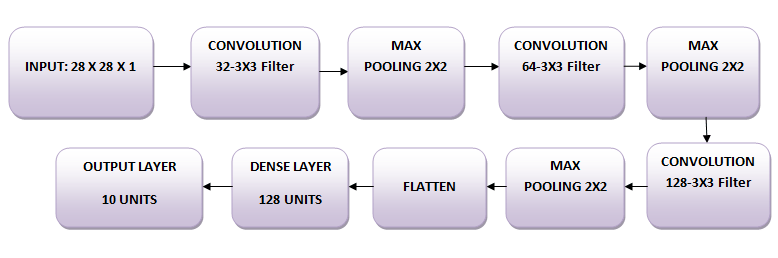

In [27]:
from keras import layers
from keras import models
from keras.layers import LeakyReLU
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [19]:
batch_size = 64
epochs = 20
num_classes = 10

In [29]:
fashion_model = Sequential()#starter
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
#These steps include the first convolution layer, activation and pooling layer.
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
#A Flatten layer is added to flatten the image data. This is necessary to feed into fully connected layers.
fashion_model.add(Dense(128, activation='linear'))
#A fully connected layer is added. It contains 128 neurons.
fashion_model.add(LeakyReLU(alpha=0.1))
#LeakyReLU activation function is added again.
fashion_model.add(Dense(num_classes, activation='softmax'))
#The output layer is added. Softmax activation function is used for classification problems. The num_classes variable specifies the number of classes.

##Compile the Model
After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms.

In [30]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [31]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

#Train the Model
It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs.

In [32]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 66s 86ms/step - loss: 0.8457 - accuracy: 0.6836 - val_loss: 0.5666 - val_accuracy: 0.7894
Epoch 2/20
750/750 [==============================] - 60s 80ms/step - loss: 0.4880 - accuracy: 0.8203 - val_loss: 0.4542 - val_accuracy: 0.8337
Epoch 3/20
750/750 [==============================] - 61s 82ms/step - loss: 0.4145 - accuracy: 0.8478 - val_loss: 0.3928 - val_accuracy: 0.8576
Epoch 4/20
750/750 [==============================] - 60s 79ms/step - loss: 0.3695 - accuracy: 0.8633 - val_loss: 0.3555 - val_accuracy: 0.8732
Epoch 5/20
750/750 [==============================] - 60s 80ms/step - loss: 0.3431 - accuracy: 0.8727 - val_loss: 0.3461 - val_accuracy: 0.8764
Epoch 6/20
750/750 [==============================] - 60s 80ms/step - loss: 0.3219 - accuracy: 0.8807 - val_loss: 0.3309 - val_accuracy: 0.8798
Epoch 7/20
750/750 [==============================] - 60s 80ms/step - loss: 0.3059 - accuracy: 0.8867 - val_loss: 0.3216 - val_accuracy:

750 refers to the total number of batches processed during each training epoch. Since your batch size is 64, it means 64 images are processed in each batch.

#Model Evaluation on the Test Set



In [33]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2932010889053345
Test accuracy: 0.9028000235557556


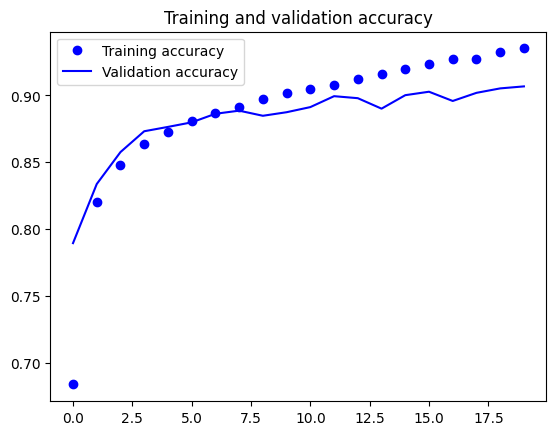

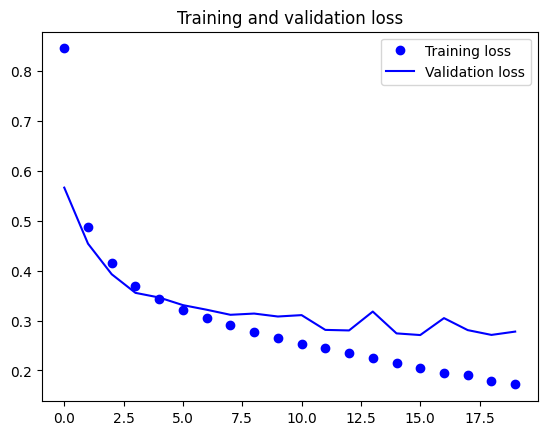

In [37]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

#Adding Dropout into the Network
You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [38]:
batch_size = 64
epochs = 20
num_classes = 10

In [39]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [40]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [41]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [42]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 66s 87ms/step - loss: 1.0597 - accuracy: 0.5967 - val_loss: 0.6160 - val_accuracy: 0.7719
Epoch 2/20
750/750 [==============================] - 64s 86ms/step - loss: 0.6129 - accuracy: 0.7659 - val_loss: 0.5006 - val_accuracy: 0.8167
Epoch 3/20
750/750 [==============================] - 64s 86ms/step - loss: 0.5233 - accuracy: 0.8046 - val_loss: 0.4472 - val_accuracy: 0.8353
Epoch 4/20
750/750 [==============================] - 64s 85ms/step - loss: 0.4724 - accuracy: 0.8228 - val_loss: 0.4101 - val_accuracy: 0.8483
Epoch 5/20
750/750 [==============================] - 65s 87ms/step - loss: 0.4330 - accuracy: 0.8360 - val_loss: 0.3714 - val_accuracy: 0.8627
Epoch 6/20
750/750 [==============================] - 64s 86ms/step - loss: 0.4100 - accuracy: 0.8449 - val_loss: 0.3856 - val_accuracy: 0.8504
Epoch 7/20
750/750 [==============================] - 64s 85ms/step - loss: 0.3910 - accuracy: 0.8539 - val_loss: 0.3533 - val_accuracy:

##Save the model

In [43]:
fashion_model.save("fashion_model_dropout.h5py")

In [49]:
!zip -r fashion_model.zip /content/fashion_model_dropout.h5py

  adding: content/fashion_model_dropout.h5py/ (stored 0%)
  adding: content/fashion_model_dropout.h5py/assets/ (stored 0%)
  adding: content/fashion_model_dropout.h5py/saved_model.pb (deflated 89%)
  adding: content/fashion_model_dropout.h5py/fingerprint.pb (stored 0%)
  adding: content/fashion_model_dropout.h5py/variables/ (stored 0%)
  adding: content/fashion_model_dropout.h5py/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/fashion_model_dropout.h5py/variables/variables.index (deflated 66%)
  adding: content/fashion_model_dropout.h5py/keras_metadata.pb (deflated 92%)


In [50]:
from google.colab import files
files.download('fashion_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Model Evaluation on the Test Set


In [52]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.2884 - accuracy: 0.8954


In [53]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2883632183074951
Test accuracy: 0.8953999876976013


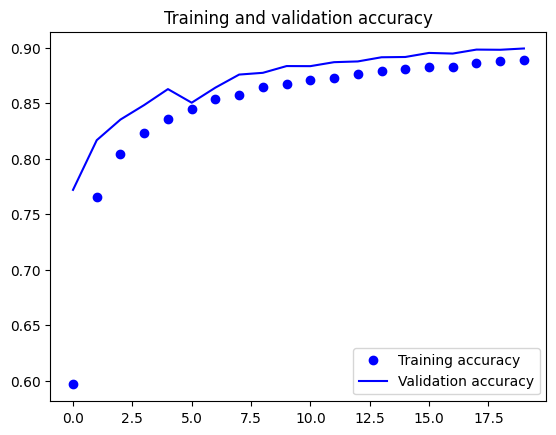

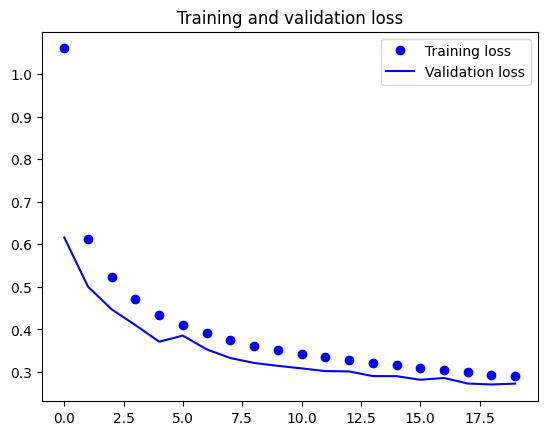

In [55]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 6s 18ms/step


In [57]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [58]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 8865 correct labels


<ipython-input-60-27f1e3758461>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


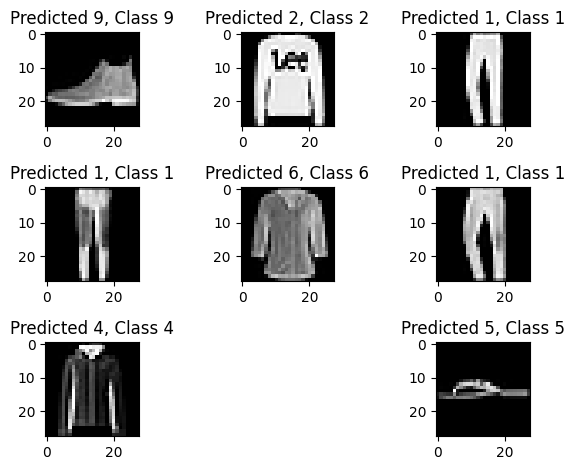

In [60]:
correct = np.where(predicted_classes==test_Y)[0]
print( "Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1135 incorrect labels


<ipython-input-62-0bf9e7d6e015>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


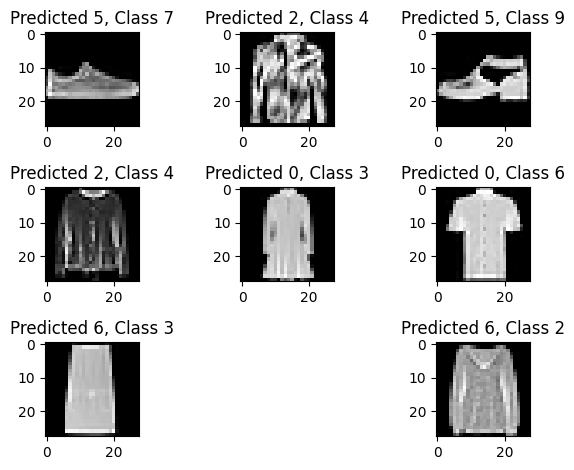

In [62]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [63]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.67      0.92      0.77      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.82      0.81      0.82      1000
     Class 3       0.91      0.90      0.91      1000
     Class 4       0.85      0.77      0.81      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.79      0.61      0.69      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

